In [1]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import h5py 
%matplotlib inline 

In [2]:
def SSA_modes(F, L): #the data F and the length of window L. 
    N = len(F) 
    K = N - L + 1 
    X = np.empty((L, K)) #  initialize the matrix X 
    for i in range(L):
        for j in range(K):
            X[i,j]=F[i+j]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T,U)#trajectory vectors 
    return A,U,V

In [3]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # test data 
A, U, V = SSA_modes(ts, 3) # decomposition by SSA with length = 3 
print(A) # eigen-values 
print(U) # eigen-vectors 
print(V) # trajectory vectors 

[129.66842566  12.           3.33157434]
[[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  2.22044605e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
[[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  4.44089210e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  4.44089210e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [4]:
def  SSA_group(A,U,V,F,I):
    N=len(F)
    L=len(A)
    K=N-L+1
    V = V.transpose() 
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    Lmin=min(L,K)
    Kmax=max(L,K)
    for k in range(0,Lmin-1):
        for m in range(0,k+1):
            G[k]+=(1/(k+1))*Z[m,k-m]
    for k in range(Lmin-1,Kmax):
        for m in range(0,Lmin):
            G[k]+=(1/Lmin)*Z[m,k-m]
    for k in range(Kmax,N+1):
        for m in range(k-Kmax+1,N-Kmax+1):
            G[k]+=(1/(N-k))*Z[m,k-m]
    return G

In [5]:
ts1 = SSA_group(A, U, V,ts,[0, 1, 2])
print(ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


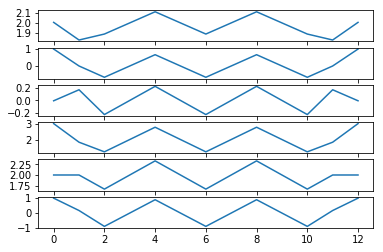

In [6]:
comp0=SSA_group(A, U, V, ts, [0])
comp1=SSA_group(A, U, V, ts, [1])
comp2=SSA_group(A, U, V, ts, [2])

comp01=SSA_group(A, U, V, ts, [0,1])
comp02=SSA_group(A, U, V, ts, [0,2])
comp12=SSA_group(A, U, V, ts, [1,2])

plt.subplot(611)
plt.plot(comp0)
plt.subplot(612)
plt.plot(comp1)
plt.subplot(613)
plt.plot(comp2)
plt.subplot(614)
plt.plot(comp01)
plt.subplot(615)
plt.plot(comp02)
plt.subplot(616)
plt.plot(comp12)
plt.show()

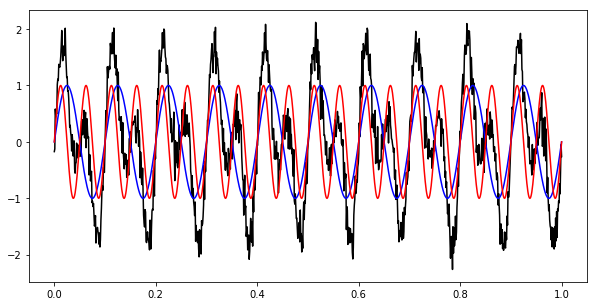

In [7]:
t = np.linspace(0, 1, 1024) 
f1 = 10 
f2 = 20 
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') # black line for data 
plt.plot(t, np.sin(2*np.pi*f1*t), 'b') # blue line for 1st periodic 
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') # red line for 2nd periodic plt.show() 
 

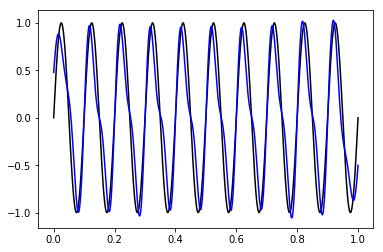

In [8]:
A, U, V = SSA_modes(F, 90)
comp12=SSA_group(A, U, V, F, [0,1])
plt.plot(t,np.sin(2*np.pi*f1*t),"k")
plt.plot(t,comp12,"b")
plt.show()

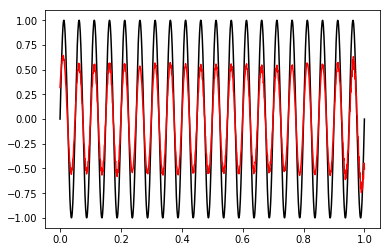

In [9]:
A, U, V = SSA_modes(F,90)
compf2=SSA_group(A, U, V, F, [4,2])
plt.plot(t,np.sin(2*np.pi*f2*t),"k")
plt.plot(t,compf2,"r")
plt.show()

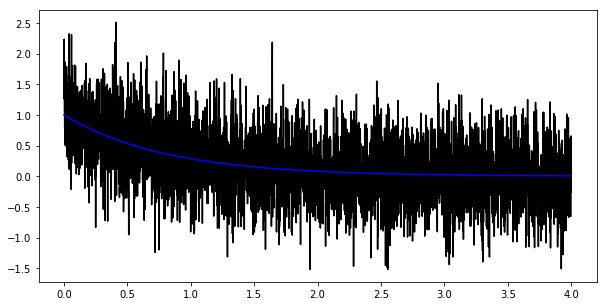

In [10]:
t = np.linspace(0, 4, 4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t,  np.exp(-0.4*np.pi*t) , 'b')
plt.show()

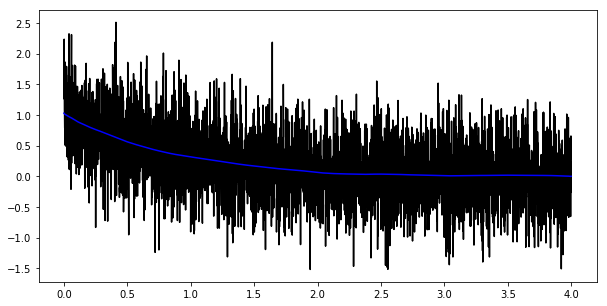

In [11]:
A, U, V = SSA_modes(F, 500)
comp0=SSA_group(A, U, V, F, [0])
plt.figure(figsize = (10, 5)) 
plt.plot(t,F,"k")
plt.plot(t,comp0,"b")
plt.show()

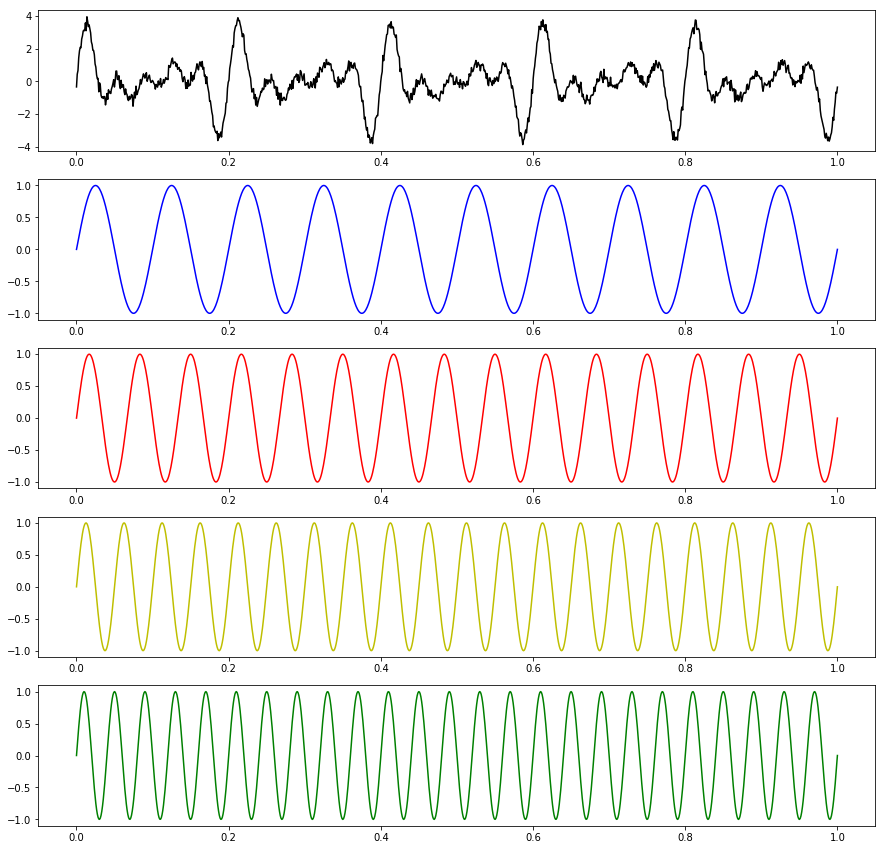

In [22]:
t = np.linspace(0, 1, 1024) 
f1 = 10
f2 = 15
f3 = 20
f4 = 25
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t)+np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (15,15)) 
plt.subplot(511)
plt.plot(t, F, 'k') # black line for data 
plt.subplot(512)
plt.plot(t, np.sin(2*np.pi*f1*t), 'b') # blue line for 1st periodic
plt.subplot(513)
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') # red line for 2nd periodic 
plt.subplot(514)
plt.plot(t, np.sin(2*np.pi*f3*t), 'y')
plt.subplot(515)
plt.plot(t, np.sin(2*np.pi*f4*t), 'g')
plt.show()

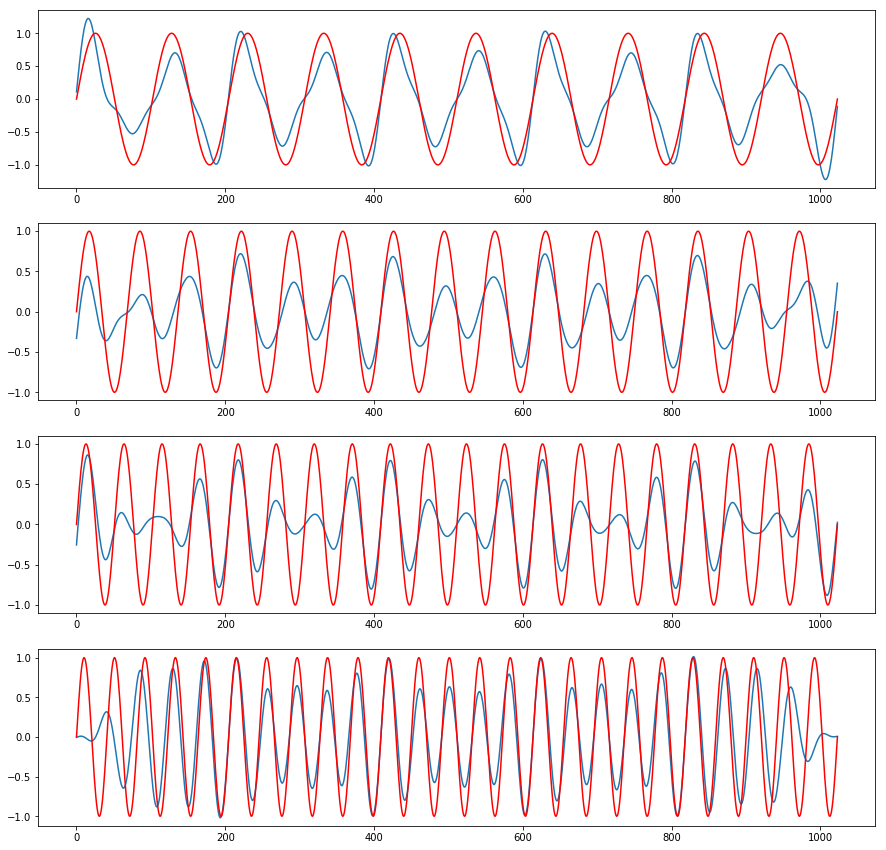

In [66]:
A, U, V = SSA_modes(F,150)
comp1=SSA_group(A, U, V, F, [0,5])
A, U, V = SSA_modes(F,150)
comp2=SSA_group(A, U, V, F, [1,7])
A, U, V = SSA_modes(F,150)
comp3=SSA_group(A, U, V, F, [2,6])
A, U, V = SSA_modes(F,200)
comp4=SSA_group(A, U, V, F, [4,3])


plt.figure(figsize = (15,15)) 
plt.subplot(411)
plt.plot(comp1)
plt.plot(np.sin(2*np.pi*f1*t), 'r') 
plt.subplot(412)
plt.plot(comp2)
plt.plot(np.sin(2*np.pi*f2*t), 'r') 
plt.subplot(413)
plt.plot(comp3)
plt.plot(np.sin(2*np.pi*f3*t), 'r') 
plt.subplot(414)
plt.plot(comp4)
plt.plot(np.sin(2*np.pi*f4*t), 'r') 



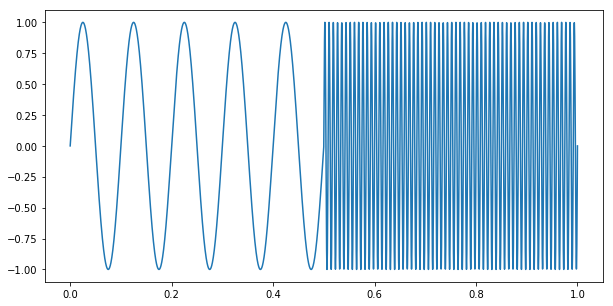

In [16]:
t = np.linspace(0, 1, 4096) 
x2 = np.zeros(4096) 
for i in range(0, len(t)//2): 
    x2[i] = np.sin(2*np.pi*10*t[i])     
for i in range(len(t)//2, len(t)): 
    x2[i] = np.sin(2*np.pi*120*t[i]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, x2)
plt.show()

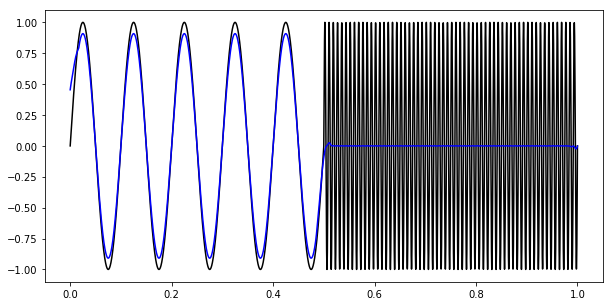

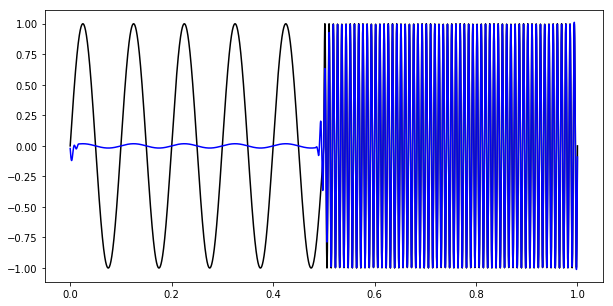

In [17]:
t = np.linspace(0, 1, 4096) 
A, U, V = SSA_modes(x2,70)
comp0=SSA_group(A, U, V, x2, [0])
comp1=SSA_group(A, U, V, x2, [1,2])
plt.figure(figsize = (10, 5)) 
plt.plot(t,x2,"k")
plt.plot(t,comp0,"b")
plt.figure(figsize = (10, 5)) 
plt.plot(t,x2,"k")
plt.plot(t,comp1,"b")
plt.show()


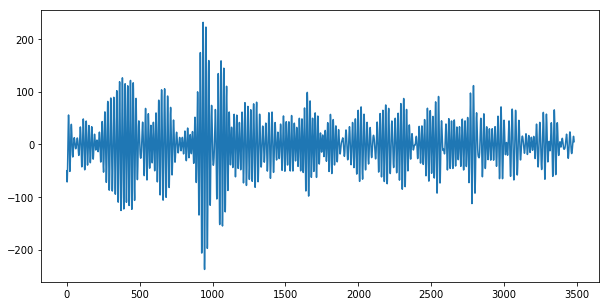

In [68]:
file = h5py.File('lab5.mat','r') 
data = file.get('EEG') 
eeg = np.array(data).T 
plt.figure(figsize = (10, 5)) 
plt.plot(eeg)
plt.show()

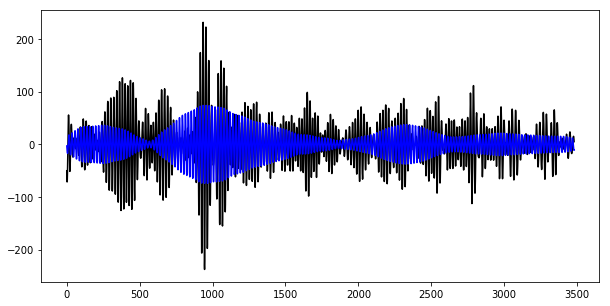

In [69]:
A, U, V = SSA_modes(eeg, 350)
comp0=SSA_group(A, U, V, eeg, [0,1])
plt.figure(figsize = (10, 5)) 
plt.plot(eeg,"k")
plt.plot(comp0,"b")
plt.show()

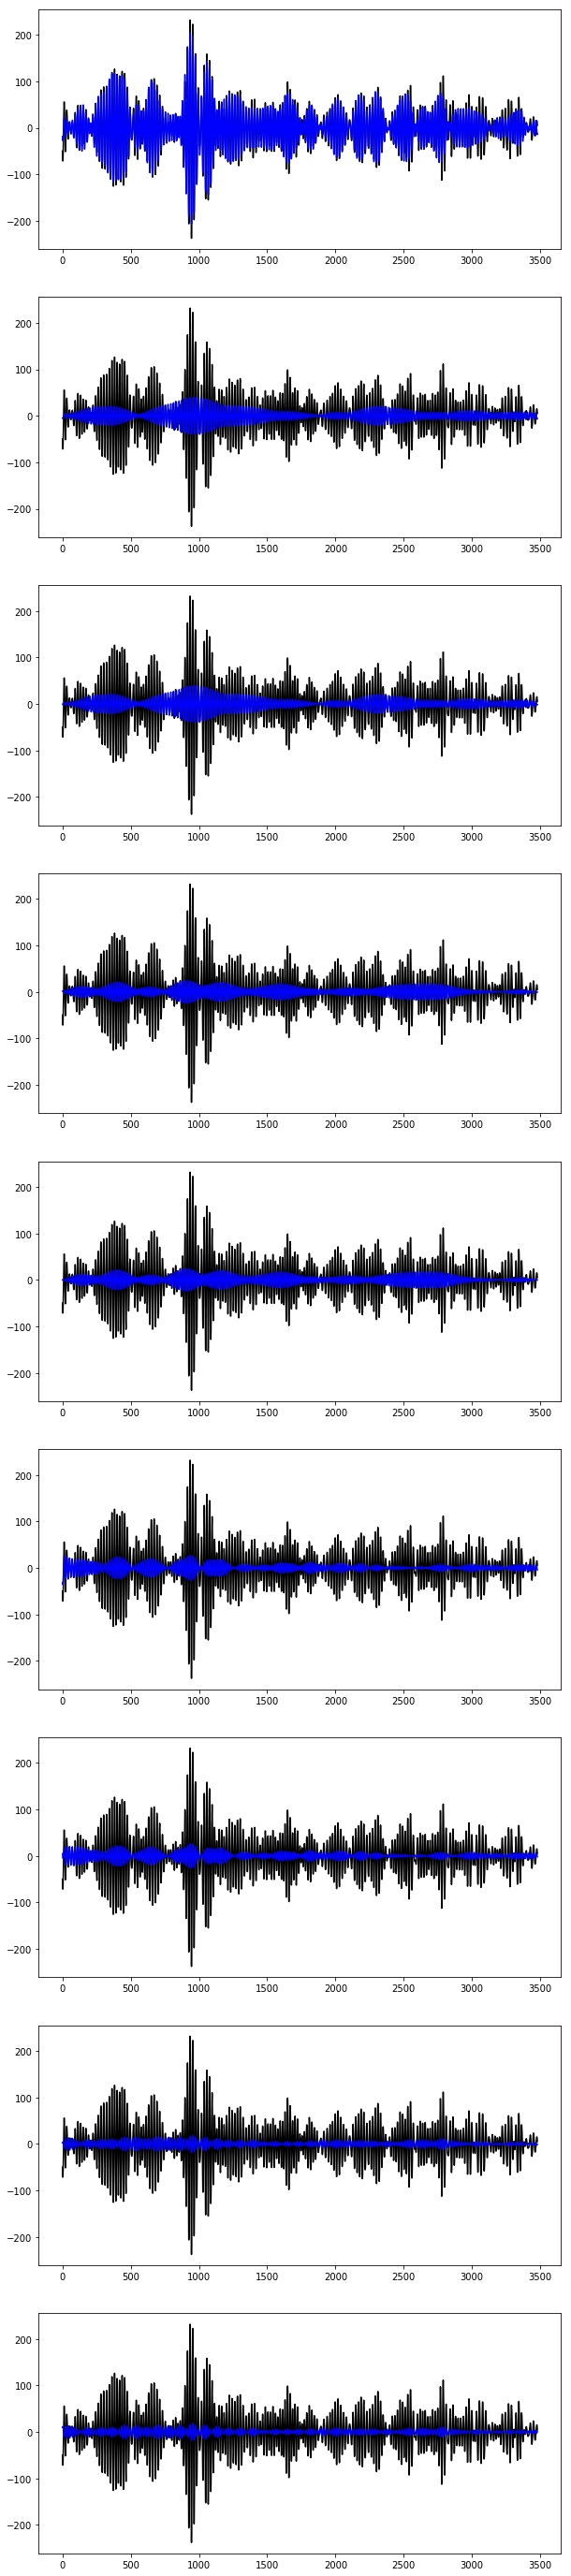

In [75]:
A, U, V = SSA_modes(eeg, 300)
comp=SSA_group(A, U, V, eeg, [0,1,2,3,4,5,6,7])
comp0=SSA_group(A, U, V, eeg, [0])
comp1=SSA_group(A, U, V, eeg, [1])
comp2=SSA_group(A, U, V, eeg, [2])
comp3=SSA_group(A, U, V, eeg, [3])
comp4=SSA_group(A, U, V, eeg, [4])
comp5=SSA_group(A, U, V, eeg, [5])
comp6=SSA_group(A, U, V, eeg, [6])
comp7=SSA_group(A, U, V, eeg, [7])
plt.figure(figsize = (10, 50)) 
plt.subplot(911)
plt.plot(eeg,"k")
plt.plot(comp,"b")
plt.subplot(912)
plt.plot(eeg,"k")
plt.plot(comp0,"b")
plt.subplot(913)
plt.plot(eeg,"k")
plt.plot(comp1,"b")
plt.subplot(914)
plt.plot(eeg,"k")
plt.plot(comp2,"b")
plt.subplot(915)
plt.plot(eeg,"k")
plt.plot(comp3,"b")
plt.subplot(916)
plt.plot(eeg,"k")
plt.plot(comp4,"b")
plt.subplot(917)
plt.plot(eeg,"k")
plt.plot(comp5,"b")
plt.subplot(918)
plt.plot(eeg,"k")
plt.plot(comp6,"b")
plt.subplot(919)
plt.plot(eeg,"k")
plt.plot(comp7,"b")
plt.show()